# Binary Knapsack Problem

A knapsack of limited capacity and a set of items are given. Each item has a weight and a profit. The goal is to select a subset of items such that the total profit is maximized and the sum of the weights does not exceed the capacity of the knapsack.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Knapsack.svg/486px-Knapsack.svg.png "Knapsack example. Source: Wikipedia")

## Data

$I:$ set of items  
$q:$ capacity of the knapsack  
$w_i:$ weight of item $i \in I$  
$p_i:$ profit of item $i \in I$  

## Variables

$x_i:$ is $1$ if item $i\in I$ is selected in the knapsack, $0$ otherwise  

## Objective function

Maximize the profit
$$z^* = \max \sum_{i \in I} p_i \cdot x_i$$

## Constraints

Do not exceed the knapsack capacity
$$\sum_{i \in I} w_i \cdot x_i \le q$$

## Model implementation

We first import Pyomo environment and create an abstract model:

In [1]:
import pyomo.environ as pyopt

model = pyopt.AbstractModel()

### Data - Set of items

We first declare the set of items $I$: the initialization is done by passing either a list or a function returning a list. In both cases the initialization does not occur until we call method `create_instance()`.

In [2]:
model.I = pyopt.Set(initialize=list(range(1,11)))

### Data - Parameters

Parameters can be initialized at least in three ways:  
  1. passing a dictionary (or a single value for non-indexed parameters) 
  2. passing a function returning a dictionary (or a single value for non-indexed parameters)
  3. passing a function taking as argument an index and returning a value  

In [3]:
import random

random.seed(0)

def getProfits(model):
    return {i: random.randrange(10, 50) for i in model.I}

def getWeights(model, i):
    return random.randrange(1, 10)

model.q = pyopt.Param(initialize=20, mutable=True)
model.p = pyopt.Param(model.I, initialize=getProfits)
model.w = pyopt.Param(model.I, rule=getWeights)

### Variables

$x_i:$ is $1$ if item $i\in I$ is selected in the knapsack, $0$ otherwise  

We declare the set of variable `x`. Variables are binary and this implicitly imposes that each item can be selected only once in the knapsack.

In [4]:
model.x = pyopt.Var(model.I, within=pyopt.Binary)

### Objective function

$$z^* = \max \sum_{i \in I} p_i \cdot x_i$$

The objective function maximizes the sum of the profits of the selected items.

In [5]:
def obj_function(model):
    return pyopt.sum(model.p[i] * model.x[i] for i in model.I)

model.z = pyopt.Objective(rule=obj_function, sense=pyopt.maximize)

### Constraints

$$\sum_{i \in I} w_i \cdot x_i \le q$$

Finally, we create the single contraint ensuring that the total weight of the selected items does not exceeds the knapsack capacity. Constraints can be created by using a function returning an expression

In [6]:
def cons_capacity(model):
    return pyopt.sum( model.w[i] * model.x[i] for i in model.I) <= model.q

model.cons_capacity = pyopt.Constraint(rule=cons_capacity)

A summary of the abstract model can be displayed. All sets have size equal to 0 because the model has not been initialized yet.

In [7]:
model.pprint()

1 Set Declarations
    I : Dim=0, Dimen=1, Size=0, Domain=None, Ordered=False, Bounds=None
        Not constructed

3 Param Declarations
    p : Size=0, Index=I, Domain=Any, Default=None, Mutable=False
        Not constructed
    q : Size=1, Index=None, Domain=Any, Default=None, Mutable=True
        Not constructed
    w : Size=0, Index=I, Domain=Any, Default=None, Mutable=False
        Not constructed

1 Var Declarations
    x : Size=0, Index=I
        Not constructed

1 Objective Declarations
    z : Size=0, Index=None, Active=True
        Not constructed

1 Constraint Declarations
    cons_capacity : Size=0, Index=None, Active=True
        Not constructed

7 Declarations: I q p w x z cons_capacity


## Solving the model

First, the elements of the model must be initialized by invoking method `create_instance()`

In [8]:
instance = model.create_instance()
instance.display()

Model unknown

  Variables:
    x : Size=10, Index=I
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :  None :     1 : False :  True : Binary
          2 :     0 :  None :     1 : False :  True : Binary
          3 :     0 :  None :     1 : False :  True : Binary
          4 :     0 :  None :     1 : False :  True : Binary
          5 :     0 :  None :     1 : False :  True : Binary
          6 :     0 :  None :     1 : False :  True : Binary
          7 :     0 :  None :     1 : False :  True : Binary
          8 :     0 :  None :     1 : False :  True : Binary
          9 :     0 :  None :     1 : False :  True : Binary
         10 :     0 :  None :     1 : False :  True : Binary

  Objectives:
    z : Size=1, Index=None, Active=True
ERROR: evaluating expression: No value for uninitialized NumericValue object x[1]
	    (expression: 34*x[1] + 36*x[2] + 12*x[3] + 26*x[4] + 42*x[5] + 41*x[6] + 35*x[7] + 29*x[8] + 40*x[9] + 32*x[10])
ERROR: evaluating obj

To solve the model we need to create the interface to a solver and start the optimization process

In [9]:
solver = pyopt.SolverFactory('glpk')
results = solver.solve(instance)
print(results)


Problem: 
- Name: unknown
  Lower bound: 204.0
  Upper bound: 204.0
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 11
  Number of nonzeros: 11
  Sense: maximize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 15
      Number of created subproblems: 15
  Error rc: 0
  Time: 0.008355140686035156
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



Once the problem is solved, the instance is modified by setting the values of the variables

In [10]:
instance.display()

Model unknown

  Variables:
    x : Size=10, Index=I
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :   1.0 :     1 : False : False : Binary
          2 :     0 :   0.0 :     1 : False : False : Binary
          3 :     0 :   1.0 :     1 : False : False : Binary
          4 :     0 :   0.0 :     1 : False : False : Binary
          5 :     0 :   1.0 :     1 : False : False : Binary
          6 :     0 :   1.0 :     1 : False : False : Binary
          7 :     0 :   1.0 :     1 : False : False : Binary
          8 :     0 :   0.0 :     1 : False : False : Binary
          9 :     0 :   1.0 :     1 : False : False : Binary
         10 :     0 :   0.0 :     1 : False : False : Binary

  Objectives:
    z : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True : 204.0

  Constraints:
    cons_capacity : Size=1
        Key  : Lower : Body : Upper
        None :  None : 20.0 :    20


Variable values can be easily retrieved after the problem is solved:

In [11]:
print("Knapsack of value {:.1f}".format(pyopt.value(instance.z)))
print("x[1] = {:.0f}".format(instance.x[1].value))
print("Selected items: " + ", ".join(str(i) for i, v in instance.x.iteritems() if v.value > 0)  )

Knapsack of value 204.0
x[1] = 1
Selected items: 1, 3, 5, 6, 7, 9


## Parametric analysis

When parameters are created setting `mutable=True`, they can be modified after the solving process. This allows  the user to perform parametric analysis

In [12]:
instance.q.set_value(30)
results = solver.solve(instance)
print("Knapsack of value {:.1f}".format(pyopt.value(instance.z)))

Knapsack of value 262.0


For example to watch how much the profit changes when the capacity increases:

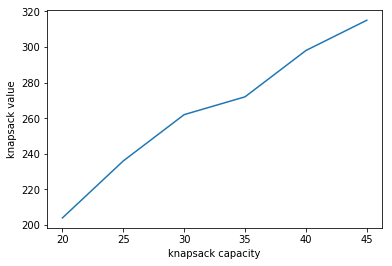

In [13]:
qs = list(range(20, 50, 5))

def parametric_analysis(q):
    instance.q.set_value(q)
    solver.solve(instance)
    return pyopt.value(instance.z)

import matplotlib.pyplot as plt
%matplotlib inline
values = list(map(parametric_analysis, qs))
plt.plot(qs, values)
plt.ylabel('knapsack value')
plt.xlabel('knapsack capacity')
plt.show()